In [1]:
#important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv(r"D:\Work\python\students performance\StudentsPerformance.csv")

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [11]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [13]:
df['race']=df['race/ethnicity']


In [17]:
df =df.drop(columns= 'race/ethnicity')
df.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,race
0,female,bachelor's degree,standard,none,72,72,74,group B
1,female,some college,standard,completed,69,90,88,group C
2,female,master's degree,standard,none,90,95,93,group B
3,male,associate's degree,free/reduced,none,47,57,44,group A
4,male,some college,standard,none,76,78,75,group C


In [19]:
df['race'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [21]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [27]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [25]:
df.isna().sum()

gender                         0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
race                           0
dtype: int64

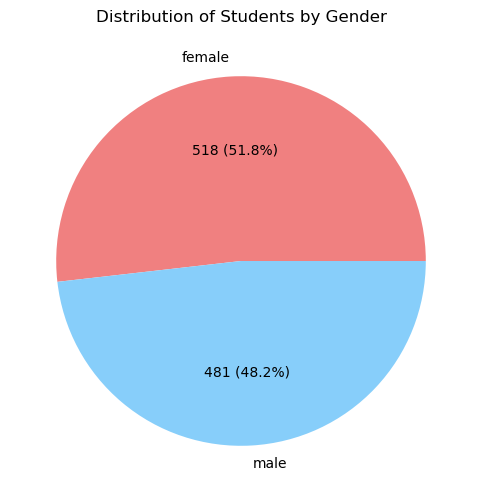

In [39]:
#EDA
#pie chart of gender
gender_counts = df['gender'].value_counts()
colors = ['lightcoral', 'lightskyblue']
labels = gender_counts.index
plt.figure(figsize = (8,6))
plt.pie(gender_counts,colors = colors ,labels =labels, autopct=lambda p: f'{int(p * sum(gender_counts) / 100)} ({p:.1f}%)' )
plt.title('Distribution of Students by Gender')
plt.show()


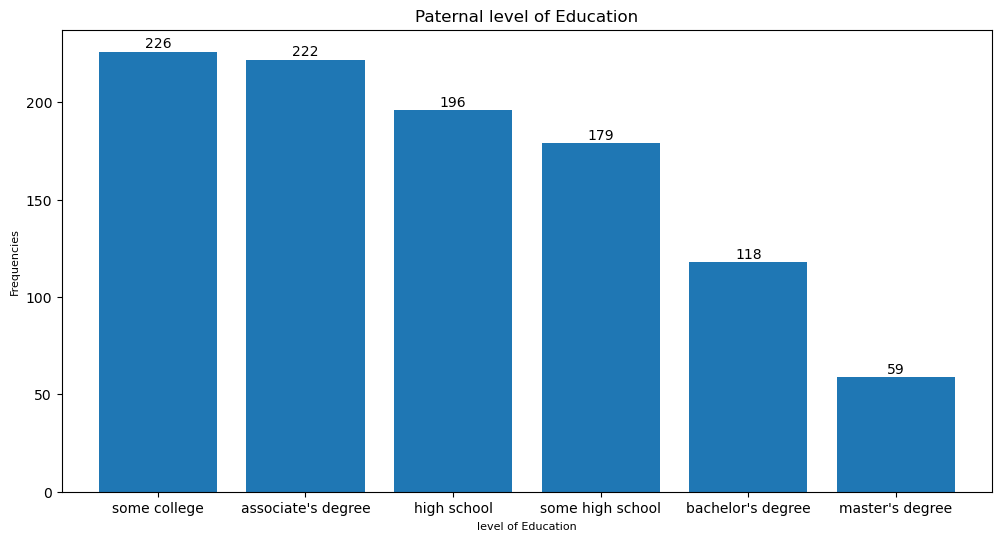

In [91]:
#bar chart paternal level : 
paternal_level_counts = df['parental level of education'].value_counts()
plt.figure(figsize = (12,6))
paternal_level_counts.plot(kind = 'bar',width =0.8)
plt.title('Paternal level of Education')
plt.xlabel ('level of Education', fontsize='8')
plt.ylabel('Frequencies', fontsize ="8")
plt.xticks(rotation=0)
for index, value in enumerate(paternal_level_counts):
    plt.text(index, value +2 , str(value), ha='center', fontsize=10)

plt.show()

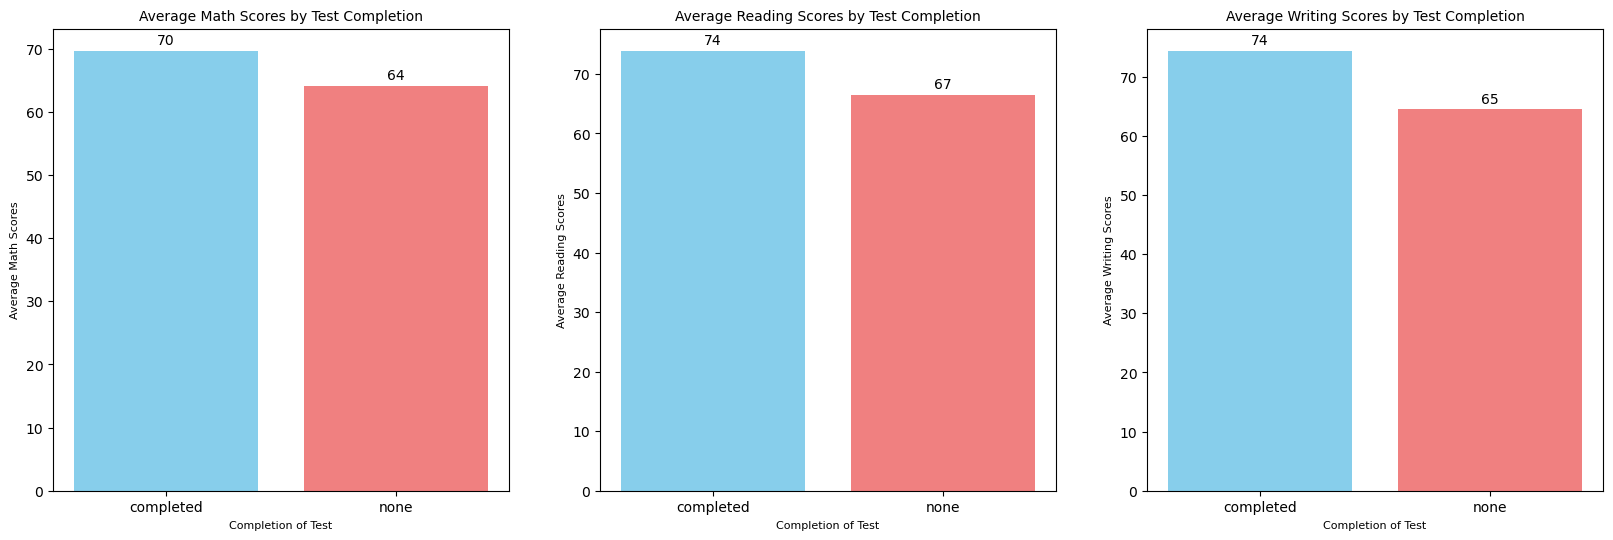

In [129]:
# Create a bar chart
M_average_scores = df.groupby('test preparation course')['math score'].mean().reset_index()
R_average_scores = df.groupby('test preparation course')['reading score'].mean().reset_index()
W_average_scores = df.groupby('test preparation course')['writing score'].mean().reset_index()

plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
bars = plt.bar(M_average_scores['test preparation course'], M_average_scores['math score'], color=['skyblue', 'lightcoral'])
# Add titles and labels
plt.title('Average Math Scores by Test Completion', fontsize=10)
plt.xlabel('Completion of Test', fontsize=8)
plt.ylabel('Average Math Scores', fontsize=8)
for bar in bars:
    ycoordinate = bar.get_height()
    xcoordinate = bar.get_x()+bar.get_width()/2
    value = round(ycoordinate)
    plt.text ( xcoordinate, ycoordinate + 1.0 , f'{value}', ha = 'center')
    
plt.subplot(1,3,2)
bars_2 = plt.bar(R_average_scores['test preparation course'], R_average_scores['reading score'], color=['skyblue', 'lightcoral'])
# Add titles and labels
plt.title('Average Reading Scores by Test Completion', fontsize=10)
plt.xlabel('Completion of Test', fontsize=8)
plt.ylabel('Average Reading Scores', fontsize=8)
for bar in bars_2:
    ycoordinate = bar.get_height()
    xcoordinate = bar.get_x()+bar.get_width()/2
    value = round(ycoordinate)
    plt.text ( xcoordinate, ycoordinate + 1.0 , f'{value}', ha = 'center')

  
plt.subplot(1,3,3)
bars_3 = plt.bar(W_average_scores['test preparation course'], W_average_scores['writing score'], color=['skyblue', 'lightcoral'])
# Add titles and labels
plt.title('Average Writing Scores by Test Completion', fontsize=10)
plt.xlabel('Completion of Test', fontsize=8)
plt.ylabel('Average Writing Scores', fontsize=8)
for bar in bars_3:
    ycoordinate = bar.get_height()
    xcoordinate = bar.get_x()+bar.get_width()/2
    value = round(ycoordinate)
    plt.text ( xcoordinate, ycoordinate + 1.0 , f'{value}', ha = 'center')

# Show the plot
plt.show() # then it's obvious that test course has an effect on scores

In [133]:
#Now we are interested in one variable which is average of all scores of three courses 
df['average scores'] = round((df['math score'] +df ['reading score'] + df['writing score'])/3)
df.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,race,average scores
0,female,bachelor's degree,standard,none,72,72,74,group B,73.0
1,female,some college,standard,completed,69,90,88,group C,82.0
2,female,master's degree,standard,none,90,95,93,group B,93.0
3,male,associate's degree,free/reduced,none,47,57,44,group A,49.0
4,male,some college,standard,none,76,78,75,group C,76.0


In [141]:
#drop three variables math, reading,writing 
df_Nodrop = df.copy()
df_Nodrop.head()


,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,race,average scores
0,female,bachelor's degree,standard,none,72,72,74,group B,73.0
1,female,some college,standard,completed,69,90,88,group C,82.0
2,female,master's degree,standard,none,90,95,93,group B,93.0
3,male,associate's degree,free/reduced,none,47,57,44,group A,49.0
4,male,some college,standard,none,76,78,75,group C,76.0


In [143]:
df.drop(columns = ['math score', 'reading score', 'writing score'], inplace =True)
df.head()

,gender,parental level of education,lunch,test preparation course,race,average scores
0,female,bachelor's degree,standard,none,group B,73.0
1,female,some college,standard,completed,group C,82.0
2,female,master's degree,standard,none,group B,93.0
3,male,associate's degree,free/reduced,none,group A,49.0
4,male,some college,standard,none,group C,76.0


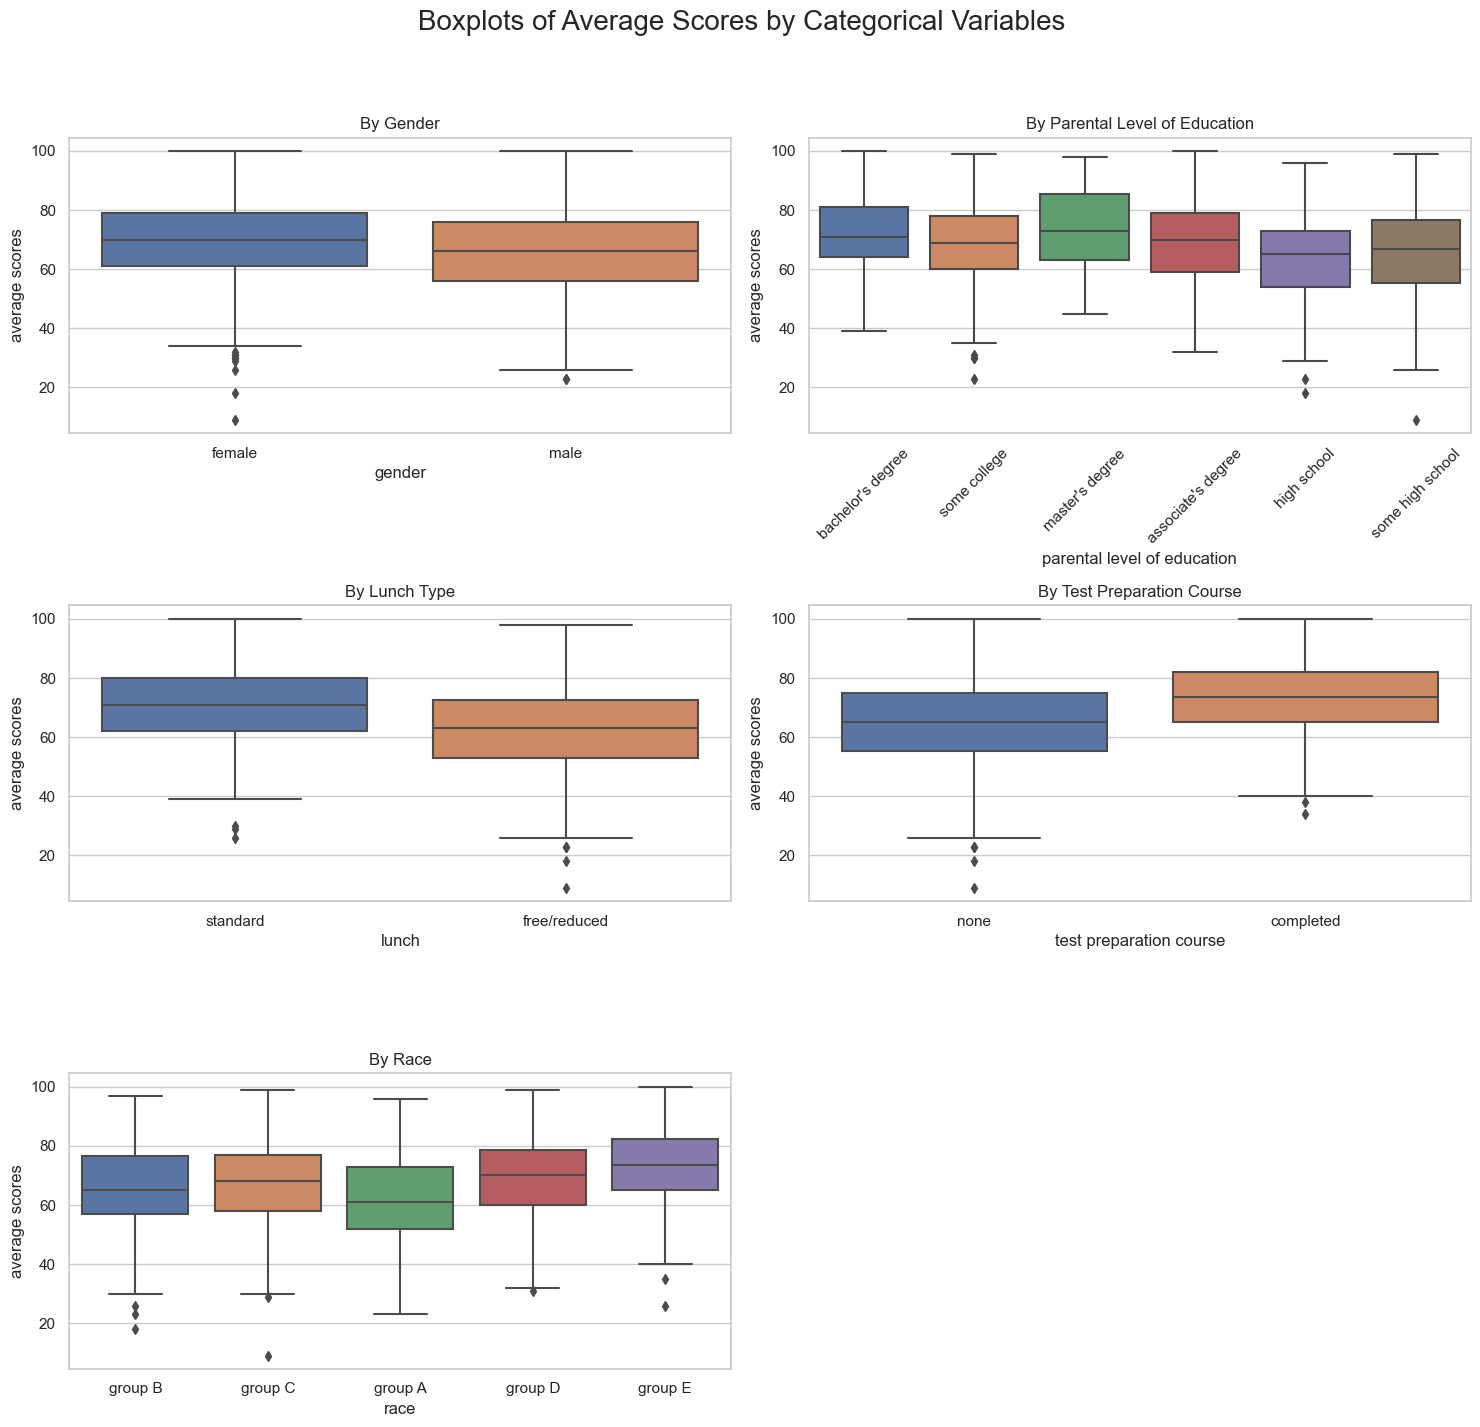

In [151]:
#lets now have alook at distribution of all variables by average scores 
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 15))  # Adjust the size as needed
fig.suptitle('Boxplots of Average Scores by Categorical Variables', fontsize=20)

# Create boxplots for each categorical variable
sns.boxplot(x='gender', y='average scores', data=df, ax=axes[0, 0])
axes[0, 0].set_title('By Gender')

sns.boxplot(x='parental level of education', y='average scores', data=df, ax=axes[0, 1])
axes[0, 1].set_title('By Parental Level of Education')
axes[0, 1].tick_params(axis='x', rotation=45)  # Rotate x labels for better visibility

sns.boxplot(x='lunch', y='average scores', data=df, ax=axes[1, 0])
axes[1, 0].set_title('By Lunch Type')

sns.boxplot(x='test preparation course', y='average scores', data=df, ax=axes[1, 1])
axes[1, 1].set_title('By Test Preparation Course')

sns.boxplot(x='race', y='average scores', data=df, ax=axes[2, 0])
axes[2, 0].set_title('By Race')

# Hide the last subplot
fig.delaxes(axes[2, 1])

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to make room for the title
plt.show()

In [201]:
#Feature Engineering 
# from previous boxplots, we notice that we have alittle outliers but its okay for grades as grades range from 0 to 100 and you can notice in any classes there are students who very clever or very very lazy
# adjust target variable which is average scores to pass/ fail - lt's put 60 a threshold for passing the exam 
pass_threshold = 60
df2= df_Nodrop.copy()
df2.drop(columns = ['math score', 'reading score', 'writing score'], inplace =True)
df2['pass/fail'] = np.where(df['average scores']>= pass_threshold, 'pass','fail')
df2
df3=df2.copy()  #for emergency
df4 = df3.copy()
df5=df4.copy()


In [203]:
df5.head()

,gender,parental level of education,lunch,test preparation course,race,average scores,pass/fail
0,female,bachelor's degree,standard,none,group B,73.0,pass
1,female,some college,standard,completed,group C,82.0,pass
2,female,master's degree,standard,none,group B,93.0,pass
3,male,associate's degree,free/reduced,none,group A,49.0,fail
4,male,some college,standard,none,group C,76.0,pass


In [205]:
mappings = {}

# Initialize LabelEncoder for each column
for column in ['gender', 'parental level of education', 'lunch', 'test preparation course', 'race']:
    le = LabelEncoder()
    df5[column] = le.fit_transform(df5[column])
    # Store the mapping in the dictionary
    mappings[column] = {index: label for index, label in enumerate(le.classes_)}

# Display the transformed DataFrame
print(df3.head())

# Print the mappings
for column, mapping in mappings.items():
    print(f"{column} Mapping: {mapping}")


   gender parental level of education         lunch test preparation course  \
0  female           bachelor's degree      standard                    none   
1  female                some college      standard               completed   
2  female             master's degree      standard                    none   
3    male          associate's degree  free/reduced                    none   
4    male                some college      standard                    none   

      race  average scores pass/fail  
0  group B            73.0      pass  
1  group C            82.0      pass  
2  group B            93.0      pass  
3  group A            49.0      fail  
4  group C            76.0      pass  
gender Mapping: {0: 'female', 1: 'male'}
parental level of education Mapping: {0: "associate's degree", 1: "bachelor's degree", 2: 'high school', 3: "master's degree", 4: 'some college', 5: 'some high school'}
lunch Mapping: {0: 'free/reduced', 1: 'standard'}
test preparation course Mapping

In [209]:
print(mappings)

{'gender': {0: 'female', 1: 'male'}, 'parental level of education': {0: "associate's degree", 1: "bachelor's degree", 2: 'high school', 3: "master's degree", 4: 'some college', 5: 'some high school'}, 'lunch': {0: 'free/reduced', 1: 'standard'}, 'test preparation course': {0: 'completed', 1: 'none'}, 'race': {0: 'group A', 1: 'group B', 2: 'group C', 3: 'group D', 4: 'group E'}}


In [211]:
df5.head(10)

,gender,parental level of education,lunch,test preparation course,race,average scores,pass/fail
0,0,1,1,1,1,73.0,pass
1,0,4,1,0,2,82.0,pass
2,0,3,1,1,1,93.0,pass
3,1,0,0,1,0,49.0,fail
4,1,4,1,1,2,76.0,pass
5,0,0,1,1,1,77.0,pass
6,0,4,1,0,1,92.0,pass
7,1,4,0,1,1,41.0,fail
8,1,2,0,0,3,65.0,pass
9,0,2,0,1,1,49.0,fail


In [213]:
#preparing for Model 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
x= df5.drop(columns =['average scores' , 'pass/fail'])
y= df5['pass/fail']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=30)



In [215]:
#build logistic & random forest Model 
#logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


In [219]:
#Evaluate Models to choose one of them 
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score
# Evaluate models
Logistic_Regression_metrics ={ "Logistic Regression Accuracy" : accuracy_score(y_test, y_pred_logistic), "Logistic Regression Confusion Matrix" : 
                              confusion_matrix(y_test, y_pred_logistic), "Logistic Regression F1 score" : f1_score(y_test, y_pred_logistic, pos_label='pass')
                             }
Random_Forest_metrics = { "Random Forest Accuracy": accuracy_score(y_test, y_pred_rf), "Random Forest Confusion Matrix":
                         confusion_matrix(y_test, y_pred_rf),"Random Forest F1 score":  f1_score(y_test, y_pred_rf, pos_label='pass')
                        }
print ( Logistic_Regression_metrics)
print ( Random_Forest_metrics)

{'Logistic Regression Accuracy': 0.7, 'Logistic Regression Confusion Matrix': array([[ 11,  49],
       [ 11, 129]], dtype=int64), 'Logistic Regression F1 score': 0.8113207547169811}
{'Random Forest Accuracy': 0.715, 'Random Forest Confusion Matrix': array([[ 16,  44],
       [ 13, 127]], dtype=int64), 'Random Forest F1 score': 0.8167202572347266}


In [ ]:
# interpret output 
#Accuracy of logistic 0.7 means that 70% of the predictions made by the Logistic Regression model were correct.
#Accuracy of random forest about 0.7 and is the same to logistic regression 
#f1 score of logistic 0.81 means that there's a big balance between percesion and recall as percesion for reducing false positives and recall for reducing false negatives 
# f1 score of random forest is 0.82 almost the same 
#from confusion matrix we can calculate percisoon tp/(fp+tp) = 129/(49+129) = 0.72 for logistics and for random forest 127/(127+44) = 0.74 it's a good percentage

In [221]:
#to know what's TP and FP in confusion matrix
cm= confusion_matrix(y_test, y_pred_logistic)
TN, FP, FN, TP = cm.ravel()

# Print the values
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")

True Positives (TP): 129
True Negatives (TN): 11
False Positives (FP): 49
False Negatives (FN): 11


In [229]:
#example of prediction 
input_data = {
    'gender': 'female',
    'parental level of education': "master's degree", 
    'lunch': 'standard',  
    'test preparation course': 'completed',
    'race': 'group B' }